# `pandas dtypes` 

In [Section 1.1](./1_1_introduction_to_pandas.ipynb), we took our first look at the `pandas.DataFrame`.  In this section, we will take a closer look at `pandas` column types.

In [89]:
import pandas as pd
from dfply import *

## Hiding stack traceback

We hide the exception traceback for didactic reasons (code source: [see this post](https://stackoverflow.com/questions/46222753/how-do-i-suppress-tracebacks-in-jupyter)).  Don't run this cell if you want to see a full traceback.

In [90]:
import sys
ipython = get_ipython()

def hide_traceback(exc_tuple=None, filename=None, tb_offset=None,
                   exception_only=False, running_compiled_code=False):
    etype, value, tb = sys.exc_info()
    return ipython._showtraceback(etype, value, ipython.InteractiveTB.get_exception_only(etype, value))

ipython.showtraceback = hide_traceback

## Outline

* Three more `dtypes`
    * `datetime`
    * `Int64`
    * `category`
* Setting the `dtypes` at read time.

## Integers with missing values

* Older `pandas` $\rightarrow$ no missing `int`
    * Use `float` instead
* Latest version $\rightarrow$ `Int` classes
    * Notice the capital `I`

## Example - Artist `BeginDate` and `EndDate`

In [91]:
artist = pd.read_csv('./data/Artists.csv')
artist.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## There are lots of `0`s in the `BeginDate` 

Do we really think the Museam of **Modern** Art has artists from 0AD?

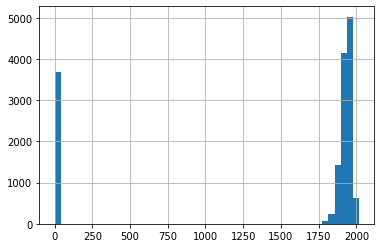

In [92]:
import matplotlib.pylab as plt
%matplotlib inline
artist.BeginDate.hist(bins=50)

## Same problem with `EndDate`, but even more so

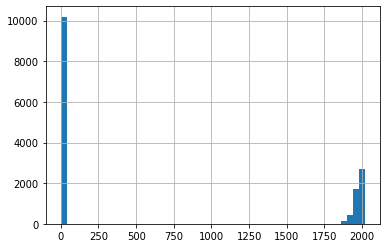

In [93]:
artist.EndDate.hist(bins=50)

## Using `apply` to remove the `0`s

In [94]:
transformed_BD = artist.BeginDate.apply(lambda val: np.nan if val == 0 else val)
transformed_BD.head()

0    1930.0
1    1936.0
2    1941.0
3    1946.0
4    1941.0
Name: BeginDate, dtype: float64

## What's up with the `float dtype`?

Good question, let's find out.

## Converting transformed `BeginDate` - attempt 1

Let's try to convert the `BeginDate` to `int`

In [95]:
transformed_BD.astype('int')

ValueError: Cannot convert non-finite values (NA or inf) to integer

## `pandas`, `int` and `np.nan` don't mix

* `pandas` `int` columns **cannot** have missing
* `pd.__version__ == 0.24.1` fixes this
    * Use `Int64` for integers with missing values
    * Note the capital `I`
* Update with `!pip install --upgrade pandas`

In [12]:
# TODO Make this future proof
#assert pd.__version__.startswith('0.24'), "Please upgrade your pandas and restart jupyter"
#!pip install --upgrade pandas



Requirement already up-to-date: pandas in /home/sandrews/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages (1.2.1)


'1.2.1'

## Converting `BeginDate` to `Int64`

Hmm, that returned a `float` column.  Let's try to force `Int64`

In [13]:
transformed_BD.astype('Int64').head(15) # There we go!

0     1930
1     1936
2     1941
3     1946
4     1941
5     1925
6     1941
7     1923
8     1918
9     1886
10    1936
11    1911
12    1907
13    1900
14    <NA>
Name: BeginDate, dtype: Int64

## Example 2 - Uber rides

**Source:** [FiveThirtyEight Uber data](https://github.com/fivethirtyeight/uber-tlc-foil-response)

**Note:** The actual data is pretty large, which we will deal with in the next section.  For now, we will load a subset (first 1000 rows).

In [25]:
#uber_april_raw = pd.read_csv("./data/uber-raw-data-apr14-small.csv")
#uber_april_raw.head()

#The file does not appear to exist, It also is not on the github repo, so I just took the liberty of doing it myself using the source

uber_april_raw_total = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv") 


In [26]:
uber_april_raw_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [88]:
uber_april_raw = uber_april_raw_total.dropna().sample(1000)

In [57]:
uber_april_raw.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 319143 to 203327
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date/Time  1000 non-null   object 
 1   Lat        1000 non-null   float64
 2   Lon        1000 non-null   float64
 3   Base       1000 non-null   object 
dtypes: float64(2), object(2)
memory usage: 39.1+ KB


## <font color="red"> Exercise 1</font>

Fix the names.  Be sure to rename the `"Date/Time"` `'date'` and name the resulting data frame `uber_april_renamed`.

In [58]:
# Your code here

uber_april_renamed = uber_april_raw.rename(columns={uber_april_raw.columns[0]: 'date', uber_april_raw.columns[1]: 'Lat', uber_april_raw.columns[2]: 'Lon', uber_april_raw.columns[3]: 'Base'})

In [97]:
uber_april_renamed.head()

,date,Lat,Lon,Base
319143,4/29/2014 19:18:00,40.7215,-73.9891,B02617
2050,4/2/2014 18:54:00,40.7835,-73.9575,B02512
335268,4/2/2014 11:11:00,40.7997,-73.9540,B02682
77326,4/9/2014 11:21:00,40.7643,-73.9846,B02598
78808,4/9/2014 17:08:00,40.7829,-73.9839,B02598


## <font color="red"> Exercise 2</font>

**Tasks:**

1. Inspect the `dtypes`
2. Suggest a good type for the `date` column

In [98]:
# Your code here

uber_april_renamed.dtypes

date     object
Lat     float64
Lon     float64
Base     object
dtype: object

> *Your answer here*

I would go with datetime, as currently string does not leave us wuth any functionallity other then the ability to read it, and any other numeric form would parse it as a raw value, when really is a category all its own and shoulbe be treated as such.

## Changing to date type with  `pd.to_datetime`

In [99]:
uber_april_rename = uber_april_renamed

In [100]:
pd.to_datetime(uber_april_rename.date.head())

319143   2014-04-29 19:18:00
2050     2014-04-02 18:54:00
335268   2014-04-02 11:11:00
77326    2014-04-09 11:21:00
78808    2014-04-09 17:08:00
Name: date, dtype: datetime64[ns]

## Making a `dfply` compatible column function.

Suppose you have a function you want to use inside `mutate` (i.e. a **column function**).  To make this function compatable with `dfply.Intention`s, you should 

1. Wrap the `pandas` call inside a function.
2. Decorate with `@make_symbolic`

In [101]:
@make_symbolic
def to_datetime(series, infer_datetime_format=True):
    return pd.to_datetime(series, infer_datetime_format=infer_datetime_format)

## Converting to dates with `dfply`

Note that above function is available in `more_dfply.to_datetime` is a `dfply` compatible version of `pd.to_datetime`.

In [35]:
#!pip install unpythonic

In [102]:
from more_dfply import to_datetime
uber_april = (uber_april_rename >>
                mutate(date = to_datetime(X.date)))
uber_april.dtypes

date    datetime64[ns]
Lat            float64
Lon            float64
Base            object
dtype: object

## Why convert to `datetime`?

This series type provides many useful date methods and attributes.  For example, we get many **dateparts methods** in the `dt` attribute.

In [105]:
uber_april_weekday = (uber_april  >>
                        mutate(weekday = X.date.dt.weekday)) #not weekday_name
uber_april_weekday.head()

,date,Lat,Lon,Base,weekday
319143,2014-04-29 19:18:00,40.7215,-73.9891,B02617,1
2050,2014-04-02 18:54:00,40.7835,-73.9575,B02512,2
335268,2014-04-02 11:11:00,40.7997,-73.9540,B02682,2
77326,2014-04-09 11:21:00,40.7643,-73.9846,B02598,2
78808,2014-04-09 17:08:00,40.7829,-73.9839,B02598,2


## <font color="red"> Exercise 3</font>

**Tasks:**

1. Use `dir` to inspect the dateparts found in `dt`
2. Add a few more datepart columns.
3. Name the resulting dataframe `uber_april_datepart`

In [66]:


dir(uber_april_weekday.date.dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'isocalendar',
 'microsecond',
 'minute',
 'month',
 'month_

In [106]:
uber_april_datepart = (uber_april_weekday  >>
                        mutate(month = X.date.dt.month) >>
                        mutate(minute = X.date.dt.minute) >>
                        mutate(quarter = X.date.dt.quarter) 
                        
                        ) 
uber_april_datepart.head()

,date,Lat,Lon,Base,weekday,month,minute,quarter
319143,2014-04-29 19:18:00,40.7215,-73.9891,B02617,1,4,18,2
2050,2014-04-02 18:54:00,40.7835,-73.9575,B02512,2,4,54,2
335268,2014-04-02 11:11:00,40.7997,-73.9540,B02682,2,4,11,2
77326,2014-04-09 11:21:00,40.7643,-73.9846,B02598,2,4,21,2
78808,2014-04-09 17:08:00,40.7829,-73.9839,B02598,2,4,8,2


## Specifying date columns while reading

Pass a list of date columns to `parse_dates`

In [107]:
from toolz import first
uber_april_with_datetime = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv", parse_dates=['Date/Time'])

uber_april_with_datetime.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

## Explicit date parsing

* Create a parser function
* Pass to `date_parser`
* Use if `pandas` fails to parse
* More information about format codes [here](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

In [75]:
#dateparse = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
#uber_april_parsered = pd.read_csv('"https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv"', 
 #                             parse_dates=['Date/Time'],
 #                             date_parser=dateparse)
#uber_april_parsered.head()

ImportError: Pandas requires version '0.7.4' or newer of 'fsspec' (version '0.6.2' currently installed).

Requirement already up-to-date: fsspec in /home/sandrews/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages (0.8.5)


## Categorical dtype

* Similar to `R`s factor
* Allows for nominal or ordinal categories

In [114]:
uber_april_weekday_cat = (uber_april_weekday >> 
                            mutate(weekday = X.weekday.astype('category')) )
                            


319143    1
2050      2
335268    2
77326     2
78808     2
         ..
134522    5
176688    5
70750     0
364338    5
203327    1
Name: weekday, Length: 1000, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

## Let's plot the weekdays with `seaborn.catplot`

In [74]:
uber_april_weekday.head()

,date,Lat,Lon,Base,weekday
319143,2014-04-29 19:18:00,40.7215,-73.9891,B02617,1
2050,2014-04-02 18:54:00,40.7835,-73.9575,B02512,2
335268,2014-04-02 11:11:00,40.7997,-73.9540,B02682,2
77326,2014-04-09 11:21:00,40.7643,-73.9846,B02598,2
78808,2014-04-09 17:08:00,40.7829,-73.9839,B02598,2


In [83]:
uber_april_weekday_cat.head()

,date,Lat,Lon,Base,weekday
319143,2014-04-29 19:18:00,40.7215,-73.9891,B02617,1
2050,2014-04-02 18:54:00,40.7835,-73.9575,B02512,2
335268,2014-04-02 11:11:00,40.7997,-73.9540,B02682,2
77326,2014-04-09 11:21:00,40.7643,-73.9846,B02598,2
78808,2014-04-09 17:08:00,40.7829,-73.9839,B02598,2


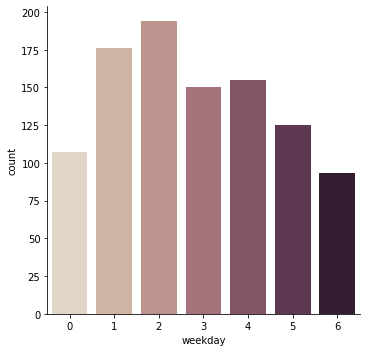

In [115]:
import seaborn as sns
sns.catplot(x="weekday", 
            kind="count", 
            palette="ch:.25", 
            data=uber_april_weekday_cat);

## Nominal by default

* Setting `'category'` makes this nominal
* Weekdays are actually ordinal
* Notice the alphabetical order in the plot.

## Making the data ordinal

1. Make a new category class with `CategoricalDtype`
2. Use `astype` with your new dtype class

#### Making an order weekday category

In [116]:
from calendar import day_name
list(day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [117]:
weekday_categories = pd.CategoricalDtype(categories=list(day_name),
                                     ordered=True)
weekday_categories

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=True)

#### Changing to our custom type

In [118]:
uber_april_weekday_ord = (uber_april_weekday >>
                            mutate(weekday = X.weekday.astype(weekday_categories)))
uber_april_weekday_ord.dtypes

date       datetime64[ns]
Lat               float64
Lon               float64
Base               object
weekday          category
dtype: object

## Plot the ordinal weekdays with `seaborn.catplot`

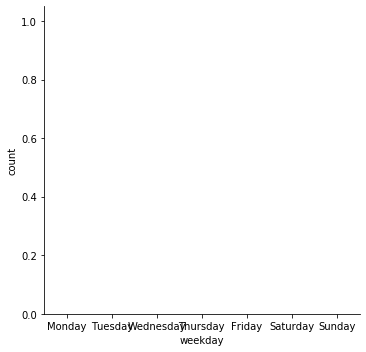

In [154]:
import seaborn as sns 
sns.catplot(x="weekday", 
            kind="count", 
            palette="ch:.25", 
            data=uber_april_weekday_ord);

## <font color="red"> Exercise 4</font>

Sometimes there is an advantage to treating calendar years as ordinal data.  Perform the following steps on the `Artist` data loaded above.

**Tasks:**

1. Remove the `0` from `BeginDate` and switch the type to `Int64`.
2. Filter out the rows that are missing `BeginDate`
3. Determine the minimum and maximum values of the filtered `BeginDate`s
4. Create a new ordinal category class for this date range.
5. Use `sns.catplot` to plot the distribution of the dates.

In [121]:
# Your code here

artist.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


In [124]:
artist.dtypes

ConstituentID      int64
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate          int64
EndDate            int64
Wiki QID          object
ULAN             float64
dtype: object

In [133]:
#task 1 filter out zeros and other nonsensical values

artist_task1 = (artist 
 >> filter_by(X.BeginDate > 0) 
 >> mutate(Begindate = X.BeginDate.astype('Int64'))
)


In [135]:
artist_task1.dtypes

ConstituentID      int64
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate          int64
EndDate            int64
Wiki QID          object
ULAN             float64
Begindate          Int64
dtype: object

In [138]:
#task 2 take only rows that have a bgein date

artist_task2 = artist_task1[artist_task1['BeginDate'].notna()]


In [140]:
artist_task2.describe() #it still showa up as float here, but the next section proves it still is int64

,ConstituentID,BeginDate,EndDate,ULAN,Begindate
count,11549.000000,11549.000000,11549.000000,2.895000e+03,11549.000000
mean,19445.042341,1930.561520,858.997143,5.000745e+08,1930.561520
std,21263.805354,35.328344,980.091289,8.645909e+04,35.328344
min,1.000000,1181.000000,0.000000,5.000000e+08,1181.000000
25%,3668.000000,1909.000000,0.000000,5.000176e+08,1909.000000
50%,7546.000000,1936.000000,0.000000,5.000331e+08,1936.000000
75%,33393.000000,1955.000000,1976.000000,5.001146e+08,1955.000000
max,133026.000000,2017.000000,2020.000000,5.003566e+08,2017.000000


In [142]:
artist_task2.dtypes

ConstituentID      int64
DisplayName       object
ArtistBio         object
Nationality       object
Gender            object
BeginDate          int64
EndDate            int64
Wiki QID          object
ULAN             float64
Begindate          Int64
dtype: object

The minimum begining date it 1181 and the maximum is 2017

In [147]:
#task 4 make oridinal

Years = range(1181, 2017+1)

year_categories = pd.CategoricalDtype(categories=Years,
                                     ordered=True)



In [149]:
 artist_task4 = (artist_task2 
 >> mutate(BeginDate = X.BeginDate.astype(year_categories))
)

In [151]:
artist_task4.dtypes

ConstituentID       int64
DisplayName        object
ArtistBio          object
Nationality        object
Gender             object
BeginDate        category
EndDate             int64
Wiki QID           object
ULAN              float64
Begindate           Int64
dtype: object

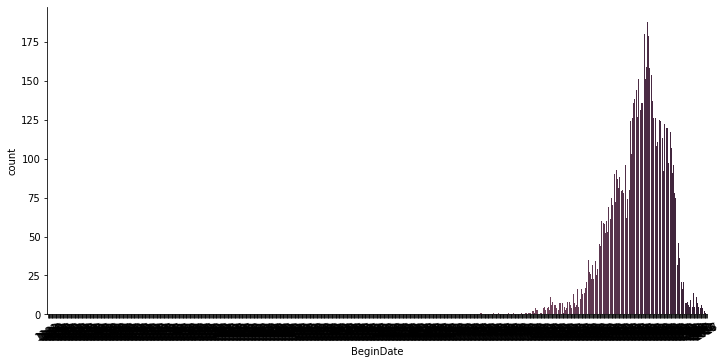

In [159]:
#task5

viz = sns.catplot(x="BeginDate", 
            kind="count", 
            palette="ch:.25", 
            data=artist_task4,
            aspect = 2);

viz.set_xticklabels(rotation=30)



The range of dates is quite large, I assume part of this may be due to the fact that I randomly made the shortened dataset because the small one from git was not available. Still, this is enough to figure the main distribution and prove the ordinal features.